# 機械学習とは何か理解しよう

経験（データ）によってタスクを解くときのパフォーマンスが改善する簡単な例を実践してみましょう。

## 0.前準備

pythonのversion確認を最初に入れています。このnotebookは2系でも3系でも動くように作ってあります。<br>
また、環境によっては単位(locale)の設定などでmatplotlibがインストールされない場合もあります。ここでは設定を確認し、空ならば設定するようにしています。

**これを実行してもエラーが出る場合はご自身で解決をお願いします。**

In [1]:
!python -V

Python 3.5.2 :: Anaconda 4.1.1 (x86_64)


In [2]:
import os

def set_locale():
    default = os.environ.get('LC_ALL')
    print( "Your default locale is", default )
    if default is None:
        os.environ.setdefault('LC_ALL', 'ja_JP.UTF-8')
        print( "Your locale is set as ja_JP.UTF-8" )

set_locale()

Your default locale is None
Your locale is set as ja_JP.UTF-8


## 1.実際に確認

「機械学習が経験Eの蓄積によってあるタスクTを解いたときのパフォーマンスPが向上する」という例の簡単なものとして、線形回帰を考えます。<br>
この場合、経験はデータ量、タスクが回帰式の係数を推測すること、パフォーマンスは回帰係数の誤差が小さいほど高い、という状況設定であるとしましょう。<br>
データ量が増加するにつれ、より正確に係数が推測されていく様子を見ていきましょう。<br>

我々が全知全能の神である状況を考え、線形回帰式 $ y = 5 x + \mathcal{N}(0,9) $ に基いてデータが生成されることを知っているとしましょう。
ここで、 $ \mathcal{N}(\mu,\sigma) $ は平均が $\mu$ で分散が $\sigma$ である正規分布です。現実ではどんな分布からデータが生成されているかは分からない場合がほとんどですが、ここでは理解のためにそれが分かっているという状況です。<br>
この式からデータを生成し、生成するデータ数が増加するとともに係数の推測精度が向上することを確認してみましょう。

まず、データ数を10個生成する場合を見てみます。

In [3]:
### import modules
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

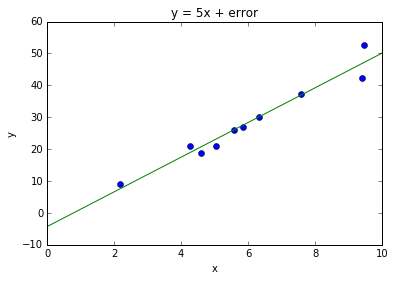

slope :  5.4371 standard error :  0.426


In [4]:
### create samples
sample_size = 10
err_sigma = 3

### generate data points
x = np.random.rand(sample_size, 1)*10
err = err_sigma*np.random.randn(sample_size, 1)
y = 5 * x  + err

### train a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(x.flatten(),y.flatten())

### make predictions
xt = np.linspace(0.0, 10, num=1000).reshape((1000, 1))
yt = xt*slope + intercept

### plot samples and regression result
plt.plot(x, y, "o")
plt.plot(xt, yt)
plt.title("y = 5x + error")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### estimate coeffieients of the regression
print( "slope : ", round(slope,4), "standard error : ", round(std_err,4) )

標準誤差が大きいため、係数の推測結果はセルの実行毎に大きく変わることに注意して下さい。

次にデータ数を100個にした場合を見てみましょう。

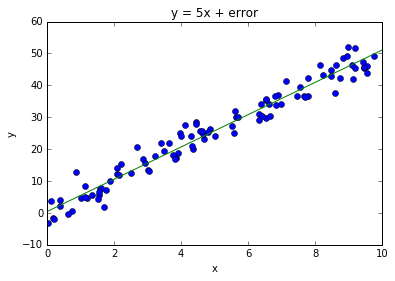

slope :  5.061 standard error :  0.1042


In [5]:
### create samples
sample_size = 100
err_sigma = 3

### generate data points
x = np.random.rand(sample_size, 1)*10
err = err_sigma*np.random.randn(sample_size, 1)
y = 5 * x  + err

### train a linear regression model
#reg = LinearRegression()
#reg.fit(x, y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x.flatten(),y.flatten())

### make predictions
xt = np.linspace(0.0, 10, num=1000).reshape((1000, 1))
yt = xt*slope + intercept

### plot samples and regression result
plt.plot(x, y, "o")
plt.plot(xt, yt)
plt.title("y = 5x + error")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### estimate coeffieients of the regression
print( "slope : ", round(slope,4), "standard error : ", round(std_err,4) )

データ数を増やすと誤差は減り、推測の精度が高まっていることが見て取れます。
これは非常に簡単な例ですが、データ量によってパフォーマンスが高まるという機械学習の本質的な性質を示しています。

興味がある方は更にデータ数を増やし、データ数と誤差の数学的な関係を考えてみるとよいでしょう。